In [23]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
fire_data = pd.read_csv('classified_data2.csv')

# Define the extent and resolution of the meshgrid
xmin, ymin = fire_data['longitude'].min(), fire_data['latitude'].min()
xmax, ymax = fire_data['longitude'].max(), fire_data['latitude'].max()
resolution = 0.1  # Set the resolution of the meshgrid (spacing between grid points)

# Create meshgrid
lon_grid, lat_grid = np.meshgrid(
    np.arange(xmin, xmax, resolution),
    np.arange(ymin, ymax, resolution)
)

# Assign unique identifier to each grid cell
grid_indices = np.arange(1, len(lon_grid.flat) + 1).reshape(lon_grid.shape)

# Aggregate fire occurrences within each grid cell
aggregated_data = []

for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        # Define the bounding box of the current grid cell
        lon_min = lon_grid[i, j]
        lon_max = lon_grid[i, j] + resolution
        lat_min = lat_grid[i, j]
        lat_max = lat_grid[i, j] + resolution

        # Filter fire occurrences within the current grid cell
        fires_within_cell = fire_data[
            (fire_data['latitude'] >= lat_min) & (fire_data['latitude'] < lat_max) &
            (fire_data['longitude'] >= lon_min) & (fire_data['longitude'] < lon_max)
        ]
        
        # Aggregate fire occurrences by year
        fire_counts_by_year = fires_within_cell['YEAR'].value_counts().to_dict()
        
        # Perform aggregation
        count = len(fires_within_cell)  # Count of fire occurrences
        avg_acq_time = fires_within_cell['acq_time'].mean()  # Average acquisition time
        if not fires_within_cell.empty:
            max_lisa_cluster = fires_within_cell['LISA_cluster'].value_counts().idxmax()  # Maximum LISA_cluster
        else:
            max_lisa_cluster = np.nan  # Handle empty case
        
        # Append aggregated data to the list
        aggregated_data.append({
            'Latitude': lat_grid[i, j],
            'Longitude': lon_grid[i, j], 
            'grid_index': grid_indices[i, j],
            'count': count,
            'avg_acq_time': avg_acq_time,
            'max_lisa_cluster': max_lisa_cluster,
            'fire_counts_by_year': fire_counts_by_year
        })

# Convert aggregated data to DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Output aggregated data as CSV file
aggregated_df.to_csv('aggregated_meshgridmeshmesh.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Read the CSV file into a Pandas DataFrame
#fire1 = pd.read_csv('classified_data.csv')
# Step 2: Filter the dataset for the specified date range (2000 to 2023)
import geopandas as gpd

# Read the shapefile
mt_kenya_shape = gpd.read_file("True_forest.shp")

# Save the shapefile data to a new GeoDataFrame
#shapefile_gdf = gpd.GeoDataFrame(geometry=mt_kenya_shape.geometry)


# Plot the Lisa Cluster shape
fig, ax = plt.subplots(figsize=(9, 9))
mt_kenya_shape.plot(ax=ax, color='white', edgecolor='gray')

fig, ax = plt.subplots(figsize=(10, 8))

# Set x and y axis limits
ax.set_xlim(xmin, xmax )
ax.set_ylim(ymin, ymax)

plt.grid(True)

fire1.plot(x ="latitude", y="longitude",kind = "scatter", ax=ax)
plt.grid()

In [34]:
import pandas as pd
import ast  # To safely evaluate string literals as Python expressions

# Load the CSV file
file_path = 'aggregated_meshgridmeshmesh.csv'
data = pd.read_csv(file_path)

# Convert 'fire_counts_by_year' from string representation of dictionary to actual dictionary
data['fire_counts_by_year'] = data['fire_counts_by_year'].apply(lambda x: ast.literal_eval(x))

# Function to expand each row's 'fire_counts_by_year' into a list of dictionaries, 
# each containing the year and the corresponding fire count
def expand_fire_counts(row):
    return [{'year': year, 'fire_count': count} for year, count in row['fire_counts_by_year'].items()]

# Apply the function to each row and then explode the dataframe to have a long format
data_long = data.copy()
data_long['year_fire_count'] = data.apply(expand_fire_counts, axis=1)
data_long = data_long.explode('year_fire_count').reset_index(drop=True)

# Extract 'year' and 'fire_count' from the dictionaries
data_long['year'] = data_long['year_fire_count'].apply(lambda x: x['year'] if pd.notnull(x) else None)
data_long['fire_count'] = data_long['year_fire_count'].apply(lambda x: x['fire_count'] if pd.notnull(x) else None)

# Drop the original 'fire_counts_by_year' and 'year_fire_count' columns as they're no longer needed
data_long.drop(['fire_counts_by_year', 'year_fire_count'], axis=1, inplace=True)

# Save the transformed dataframe to a new CSV file
output_file_path = 'transformed_meshmeshmeshmeshaggregate.csv'
data_long.to_csv(output_file_path, index=False)

# Display the path to the new CSV file
output_file_path

'transformed_meshmeshmeshmeshaggregate.csv'

In [36]:
import pandas as pd

# Read the CSV data into a DataFrame
df = pd.read_csv('transformed_meshmeshmeshmeshaggregate.csv')

# Sort the data by year
df_sorted = df.sort_values(by='year')

# Group the data by year
grouped_by_year = df_sorted.groupby('year')

# Iterate over each group and save to separate CSV files
for year, group_df in grouped_by_year:
    group_df.to_csv(f'groupedmeshmeshmesh_data_{year}.csv', index=False)


In [37]:
import pandas as pd

# Read the CSV data into a DataFrame
df = pd.read_csv('transformed_meshmeshmeshmeshaggregate.csv')

# Sort the data by year
df_sorted = df.sort_values(by='year')

# Group the data by year
grouped_by_year = df_sorted.groupby('year')

# Concatenate all groups into one DataFrame with an additional 'Year' column
grouped_data = pd.concat([group.assign(Year=year) for year, group in grouped_by_year], ignore_index=True)

# Save the grouped data to a single CSV file
grouped_data.to_csv('grouped_data_by_yearmeshedmeshed.csv', index=False)


In [1]:
import pandas as pd

# Read the CSV data into a DataFrame
df = pd.read_csv('grouped_data_by_yearmeshedmeshed.csv')

# Convert specific columns from float to int
columns_to_convert = ['max_lisa_cluster', 'year', 'fire_count', 'Year']
df[columns_to_convert] = df[columns_to_convert].astype(int)

# Save the modified DataFrame to a new CSV file
df.to_csv('grouped_data_by_yearmeshedmeshedint.csv', index=False)


In [9]:
#BOOSTED REGERESSION TREE

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = pd.read_csv('grouped_data_by_yearmeshedmeshedint.csv')
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


merged_data.head()

,Latitude,Longitude,grid_index,count,avg_acq_time,max_lisa_cluster,year,fire_count,YEAR,Precipitation,LST,TS,RelaHum,Spechum,NDVI
0,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756
1,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756
2,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756
3,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756
4,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756


In [2]:
# Feature selection
features = ['grid_index','max_lisa_cluster','Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
#features = ['latitude','longitude','YEAR','month','day','Precipitation', 'Wetsurface','Wetroot','Wdirection', 'Wspeed']

X = merged_data[features]
#y = merged_data['fire_count']
y = merged_data['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import xgboost as xgb


In [4]:
model = xgb.XGBRegressor()

In [5]:
#model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400,500,600],
    'max_depth': [3, 5, 7, 9, 11, 13],
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Initialize XGBoost regressor
model = xgb.XGBRegressor()

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and update the model
best_params = grid_search.best_params_
model = xgb.XGBRegressor(**best_params)

# Train the model with the best parameters
model.fit(X_train, y_train)


In [ ]:
#model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Root Mean Squared Error:", rmse)
print("Mean Squared Error (MSE):", mse)

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
xgb.plot_importance(model)
plt.show()


In [13]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd

# Assuming merged_data contains your historical data
# Extract 'YEAR' and 'ANN' features for training
X_train_year = merged_data[['grid_index']].values  # Extract 'YEAR' as feature for training
y_train_ann = merged_data['count'].values  # Target variable (ANN values)

# Initialize the Gradient Boosting Regressor model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting.fit(X_train_year, y_train_ann)

# Generate future timestamps for the next five years starting from 2020
#future_years = np.arange(2020, 2020 + 10).reshape(-1, 1)  # Next five years starting from 2020

# Predict ANN values for the next five years using the trained model
predicted_ann_future_gb = gradient_boosting.predict(future_years)

# Round the predicted fire occurrences to the nearest integer
predicted_ann_future_gb_rounded = np.round(predicted_ann_future_gb).astype(int)
print("Predicted ANN Values for the Next Five Years (Gradient Boosting Regressor):")
for year, ann_value in zip(future_years.flatten(), predicted_ann_future_gb_rounded):
    print(f"Year {year}: Predicted ANN = {ann_value:.0f}")

Predicted ANN Values for the Next Five Years (Gradient Boosting Regressor):
Year 2020: Predicted ANN = 38
Year 2021: Predicted ANN = 54
Year 2022: Predicted ANN = 82
Year 2023: Predicted ANN = 82
Year 2024: Predicted ANN = 82
Year 2025: Predicted ANN = 82
Year 2026: Predicted ANN = 82
Year 2027: Predicted ANN = 82
Year 2028: Predicted ANN = 82
Year 2029: Predicted ANN = 82


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_mse_results = []
test_mse_results = []

for estimator in n_estimators:
    xgb_model = xgb.XGBRegressor(n_estimators=estimator)
    xgb_model.fit(X_train, y_train)
    
    train_pred = xgb_model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_pred)
    train_mse_results.append(train_mse)
    
    test_pred = xgb_model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_mse_results.append(test_mse)

plt.plot(n_estimators, train_mse_results, "b", label="Train MSE")
plt.plot(n_estimators, test_mse_results, "r", label="Test MSE")
plt.legend()
plt.ylabel("MSE score")
plt.xlabel("n_estimators")
plt.title("MSE vs n_estimators for XGBoost Regressor")
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(7, 4))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()



In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# Assuming merged_data is a DataFrame with columns 'grid_index', 'year', and 'count'

# Extract features and target variable for training
X_train = merged_data[['grid_index', 'year']].values  # Use 'grid_index' and 'year' as features
y_train = merged_data['count'].values  # Target variable (ANN values)

# Initialize the Gradient Boosting Regressor model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting.fit(X_train, y_train)

# Create a DataFrame for grid indices around 63 for the year 2022
grid_indices = np.arange(60, 66)  # Example range around 63
year = 2022
future_data = pd.DataFrame({'grid_index': grid_indices, 'year': year})

# Predict ANN values for the specified grid indices for the year 2022 using the trained model
predicted_ann_future_gb = gradient_boosting.predict(future_data)

# Round the predicted fire occurrences to the nearest integer
predicted_ann_future_gb_rounded = np.round(predicted_ann_future_gb).astype(int)

print("Predicted ANN Values for Grid Indices Around 63 for the Year 2022 (Gradient Boosting Regressor):")
for grid_index, ann_value in zip(grid_indices, predicted_ann_future_gb_rounded):
    print(f"Grid Index {grid_index}: Predicted ANN = {ann_value:.0f}")


In [47]:
#GRADIENT BOOSTING REGRESSION

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = pd.read_csv('grouped_data_by_yearmeshedmeshedint.csv')
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


merged_data.head()

,Latitude,Longitude,grid_index,count,avg_acq_time,max_lisa_cluster,year,fire_count,YEAR,Precipitation,LST,TS,RelaHum,Spechum,NDVI
0,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756
1,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756
2,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756
3,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756
4,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756


In [61]:
# Feature selection
features = ['grid_index','max_lisa_cluster','Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
#features = ['latitude','longitude','YEAR','month','day','Precipitation', 'Wetsurface','Wetroot','Wdirection', 'Wspeed']

X = merged_data[features]
#y = merged_data['fire_count']
y = merged_data['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Initialize the Gradient Boosting Regressor model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred_gb = gradient_boosting.predict(X_test)


In [63]:
from sklearn.metrics import mean_squared_error
# Calculate and print the Mean Squared Error (MSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print("Mean Squared Error (MSE) for Gradient Boosting Regressor:", mse_gb)
print("Root Mean Squared Error (RMSE) for Gradient Boosting Regressor :", rmse_gb)

Mean Squared Error (MSE) for Gradient Boosting Regressor: 7.103626838030919
Root Mean Squared Error (RMSE) for Gradient Boosting Regressor : 2.665262996034522


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Save the model to a file
joblib.dump(gradient_boosting, 'gb_regressor_model.pkl')

# Load the model from the file
loaded_gb_model = joblib.load('gb_regressor_model.pkl')


In [ ]:
# Assume new_data is a dictionary or DataFrame containing the features for prediction
new_data = {
    'latitude': 0.28,
    'longitude': 37.3,
    'Precipitation': 8.0,
    'LST': 20.0,
    'TS': 21.0,
    'RelaHum': 70.0,
    'Spechum': 12.0,
    'NDVI': 0.55
}

# Convert new_data to DataFrame or 2D array
input_df = pd.DataFrame([new_data])

# Ensure that the features in input_df are in the same order and format as X_train
# Normalize/Scale the new data (if needed) using the same scaler used for X_train

# Make predictions using the trained model
predicted_ann = gradient_boosting.predict(input_df)

# You can use the predicted_ann directly for point predictions, or compute confidence intervals, etc.
print("Predicted ANN Value:", predicted_ann)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd

# Assuming merged_data contains your historical data
# Extract 'YEAR' and 'ANN' features for training
X_train_year = merged_data[['YEAR']].values  # Extract 'YEAR' as feature for training
y_train_ann = merged_data['ANN'].values  # Target variable (ANN values)

# Initialize the Gradient Boosting Regressor model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting.fit(X_train_year, y_train_ann)

# Generate future timestamps for the next five years starting from 2020
future_years = np.arange(2020, 2020 + 10).reshape(-1, 1)  # Next five years starting from 2020

# Predict ANN values for the next five years using the trained model
predicted_ann_future_gb = gradient_boosting.predict(future_years)

print("Predicted ANN Values for the Next Five Years (Gradient Boosting Regressor):")
for year, ann_value in zip(future_years.flatten(), predicted_ann_future_gb):
    print(f"Year {year}: Predicted ANN = {ann_value:.2f}")


In [ ]:
# Predict ANN values for the next five years using the trained model
predicted_ann_future_gb = gradient_boosting.predict(future_years)

# Round the predicted fire occurrences to the nearest integer
predicted_ann_future_gb_rounded = np.round(predicted_ann_future_gb).astype(int)

print("Predicted Fire Occurrences for the Next Five Years (Gradient Boosting Regressor):")
for year, fire_occurrence in zip(future_years.flatten(), predicted_ann_future_gb_rounded):
    print(f"Year {year}: Predicted Fire Occurrence = {fire_occurrence}")


In [58]:
#LSTM

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = pd.read_csv('grouped_data_by_yearmeshedmeshedint.csv')
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


merged_data.head()

,Latitude,Longitude,grid_index,count,avg_acq_time,max_lisa_cluster,year,fire_count,YEAR,Precipitation,LST,TS,RelaHum,Spechum,NDVI
0,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756
1,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756
2,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756
3,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756
4,0.1726,37.6549,62,4,779.75,1,2001,1,2001,5.27,18.64,18.69,72.75,10.74,0.514756


In [8]:
# Feature selection
features = ['grid_index','max_lisa_cluster','Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
#features = ['latitude','longitude','YEAR','month','day','Precipitation', 'Wetsurface','Wetroot','Wdirection', 'Wspeed']

X = merged_data[features]
#y = merged_data['fire_count']
y = merged_data['count']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential  # Import Sequential from keras.models
from keras.layers import LSTM, Dense

# Assuming you have loaded your data and defined X, y here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM
X_train_rnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_rnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Initialize the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))
lstm_model.add(Dense(units=1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss = lstm_model.evaluate(X_train_rnn, y_train)
test_loss = lstm_model.evaluate(X_test_rnn, y_test)

print(f"Training loss: {train_loss}")
print(f"Testing loss: {test_loss}")


C:\Users\DANIEL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
44712/44712 ━━━━━━━━━━━━━━━━━━━━ 175s 4ms/step - loss: 662.2468
Epoch 2/10
44712/44712 ━━━━━━━━━━━━━━━━━━━━ 159s 4ms/step - loss: 23.7139
Epoch 3/10
44712/44712 ━━━━━━━━━━━━━━━━━━━━ 173s 4ms/step - loss: 23.8611
Epoch 4/10
44712/44712 ━━━━━━━━━━━━━━━━━━━━ 156s 3ms/step - loss: 8.7907
Epoch 5/10
44712/44712 ━━━━━━━━━━━━━━━━━━━━ 180s 4ms/step - loss: 12.8712
Epoch 6/10
44712/44712 ━━━━━━━━━━━━━━━━━━━━ 189s 4ms/step - loss: 5.0529
Epoch 7/10
44712/44712 ━━━━━━━━━━━━━━━━━━━━ 190s 4ms/step - loss: 3.3586
Epoch 8/10
44712/44712 ━━━━━━━━━━━━━━━━━━━━ 192s 4ms/step - loss: 1.9013
Epoch 9/10
44712/44712 ━━━━━━━━━━━━━━━━━━━━ 192s 4ms/step - loss: 1.2612
Epoch 10/10
44712/44712 ━━━━━━━━━━━━━━━━━━━━ 208s 5ms/step - loss: 0.7463
44712/44712 ━━━━━━━━━━━━━━━━━━━━ 115s 3ms/step - loss: 0.0421
11178/11178 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 0.0417
Training loss: 0.041953593492507935
Testing loss: 0.04172224551439285


In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions
y_pred_train = lstm_model.predict(X_train_rnn)
y_pred_test = lstm_model.predict(X_test_rnn)

# Calculate MSE and RMSE for training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

# Calculate MSE and RMSE for test set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"Training MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}")


44712/44712 ━━━━━━━━━━━━━━━━━━━━ 131s 3ms/step
11178/11178 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step
Training MSE: 0.0420, RMSE: 0.2048
Testing MSE: 0.0417, RMSE: 0.2043


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have already defined y_test and y_pred_lstm
y_pred_lstm = lstm_model.predict(X_test_rnn)
# Calculate and print the Mean Squared Error (MSE)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
print("Mean Squared Error (MSE) for LSTM:", mse_lstm)
print("Root Mean Squared Error (RMSE) for LSTM:", rmse_lstm)


11178/11178 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step
Mean Squared Error (MSE) for LSTM: 0.041722200405866744
Root Mean Squared Error (RMSE) for LSTM: 0.20426012926135817


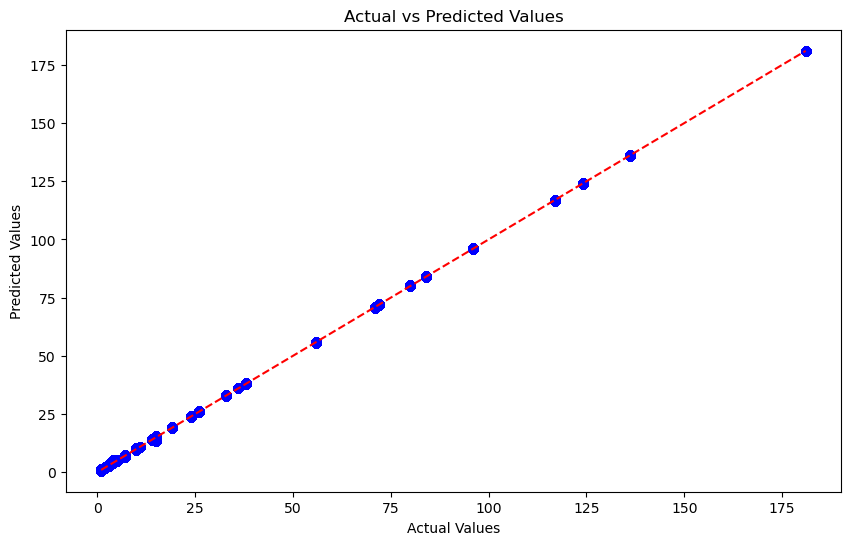

In [21]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual values and y_pred_lstm contains the predicted values

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lstm, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line for reference
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [22]:
from keras.models import load_model

# Assuming you have already trained and evaluated your LSTM model (lstm_model)

# Save the trained model
model_path = "lstm_modelmesh.h5"
lstm_model.save(model_path)
print("Model saved successfully.")

# Load the saved model
loaded_model = load_model(model_path)
print("Model loaded successfully.")

# Now you can use the loaded_model for prediction, evaluation, or further training


Model saved successfully.
Model loaded successfully.


In [24]:
# Save the model in the native Keras format with .h5 extension
lstm_model.save('my_model.h5')

# Or save with .keras extension
lstm_model.save('my_model.keras')

In [29]:
def predict_fire_occurrence(weather_data, grid_index):
    # Preprocess the input data
    data = list(weather_data.values())
    # Check if all features are present
    if len(data) < 7:
        # Add a default value for the missing feature
        data.append(DEFAULT_VALUE)  # Replace DEFAULT_VALUE with an appropriate value
    data.append(grid_index)  # Append grid_index
    scaled_data = scaler.transform([data])  # Scale the input data using the previously trained scaler
    reshaped_data = scaled_data.reshape((scaled_data.shape[0], scaled_data.shape[1], 1))  # Reshape for LSTM input
    
    # Make predictions
    count_pred = lstm_model.predict(reshaped_data)[0][0]  # Predict count
    max_lisa_cluster_pred = lstm_model.predict_classes(reshaped_data)[0][0]  # Predict Max_Lisa_cluster
    likelihood_percentage = (1 - count_pred / y_train.max()) * 100  # Calculate likelihood as percentage

    return {
        'count_pred': count_pred,
        'max_lisa_cluster_pred': max_lisa_cluster_pred,
        'likelihood_percentage': likelihood_percentage
    }


In [33]:
def predict_fire_occurrence(weather_data, grid_index):
    # Preprocess the input data
    data = list(weather_data.values())
    # Check if all features are present
    if len(data) < 7:
        # Add a default value for the missing feature
        data.append(DEFAULT_VALUE)
    data.append(grid_index)  # Append grid_index
    scaled_data = scaler.transform([data])  # Scale the input data using the previously trained scaler
    reshaped_data = scaled_data.reshape((scaled_data.shape[0], scaled_data.shape[1], 1))  # Reshape for LSTM input
    
    # Make predictions
    count_pred = lstm_model.predict(reshaped_data)[0][0]  # Predict count
    # Get the predicted class (Max_Lisa_cluster) based on threshold (e.g., 0.5)
    max_lisa_cluster_pred = 1 if count_pred >= 0.5 else 0
    likelihood_percentage = (1 - count_pred / y_train.max()) * 100  # Calculate likelihood as percentage

    return {
        'count_pred': count_pred,
        'max_lisa_cluster_pred': max_lisa_cluster_pred,
        'likelihood_percentage': likelihood_percentage
    }

# Example usage
weather_conditions = {
    'Precipitation': 0.2,
    'LST': 18.5,
    'TS': 15.0,
    'RelaHum': 60.0,
    'Spechum': 8.0,
    'NDVI': 0.6
}
grid_idx = 1  # Example grid index

prediction = predict_fire_occurrence(weather_conditions, grid_idx)
print("Predicted Count:", prediction['count_pred'])
print("Predicted Max_Lisa_cluster:", prediction['max_lisa_cluster_pred'])
print("Likelihood of Occurrence (%):", prediction['likelihood_percentage'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Count: -0.68719953
Predicted Max_Lisa_cluster: 0
Likelihood of Occurrence (%): 100.37966825026834


C:\Users\DANIEL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
def predict_fire_occurrence(weather_data, grid_index):
    # Preprocess the input data
    data = list(weather_data.values())
    # Check if all features are present
    if len(data) < 7:
        # Add a default value for the missing feature
        data.append(DEFAULT_VALUE)
    data.append(grid_index)  # Append grid_index
    scaled_data = scaler.transform([data])  # Scale the input data using the previously trained scaler
    reshaped_data = scaled_data.reshape((scaled_data.shape[0], scaled_data.shape[1], 1))  # Reshape for LSTM input
    
    # Make predictions
    count_pred = lstm_model.predict(reshaped_data)[0][0]  # Predict count
    # Round the count_pred to the nearest integer to get Max_Lisa_cluster
    max_lisa_cluster_pred = int(round(count_pred))
    likelihood_percentage = (1 - count_pred / y_train.max()) * 100  # Calculate likelihood as percentage

    return {
        'count_pred': count_pred,
        'max_lisa_cluster_pred': max_lisa_cluster_pred,
        'likelihood_percentage': likelihood_percentage
    }

# Example usage
weather_conditions = {
    'Precipitation': 0.2,
    'LST': 30.5,
    'TS': 25.0,
    'RelaHum': 70.0,
    'Spechum': 10.0,
    'NDVI': 0.6
}
grid_idx = 1  # Example grid index

prediction = predict_fire_occurrence(weather_conditions, grid_idx)
print("Predicted Count:", prediction['count_pred'])
print("Predicted Max_Lisa_cluster:", prediction['max_lisa_cluster_pred'])
print("Likelihood of Occurrence (%):", prediction['likelihood_percentage'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Count: -0.806757
Predicted Max_Lisa_cluster: -1
Likelihood of Occurrence (%): 100.44572208467768


C:\Users\DANIEL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
